## Time Series Analysis SARIMA Model

In [71]:
#Import the necessary libraries and modules
import numpy as np
import pandas as pd
from plotly import graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [72]:
#Reading the datatset
data = pd.read_csv(r"C:\ETH-USD.csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-12-26,763.369995,786.789978,760.934998,773.835999,773.835999,2201159936
1,2017-12-27,774.969971,789.252991,738.413025,762.841980,762.841980,2100029952
2,2017-12-28,762.208008,763.318970,701.187012,737.023010,737.023010,2389149952
3,2017-12-29,740.388977,770.117004,729.607971,753.591980,753.591980,2648969984
4,2017-12-30,753.815002,753.815002,685.231018,717.257019,717.257019,3187780096
...,...,...,...,...,...,...,...
1822,2022-12-22,1213.672607,1221.986816,1187.127808,1218.182129,1218.182129,5297471739
1823,2022-12-23,1218.079346,1226.998779,1215.994873,1220.159424,1220.159424,4835831923
1824,2022-12-24,1220.117920,1224.911621,1216.338745,1221.148560,1221.148560,2626153345
1825,2022-12-25,1221.171509,1223.517822,1203.719604,1218.962036,1218.962036,3942720070


## Explanatory Data Analysis

In [73]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1827.0,1.145779e+03,1.200666e+03,8.427969e+01,2.091787e+02,5.191081e+02,1.802181e+03,4.810071e+03
High,1827.0,1.182323e+03,1.237508e+03,8.534274e+01,2.137334e+02,5.341970e+02,1.839939e+03,4.891705e+03
Low,1827.0,1.103916e+03,1.158148e+03,8.282989e+01,2.036581e+02,5.002500e+02,1.731902e+03,4.718039e+03
Close,1827.0,1.145801e+03,1.200147e+03,8.430830e+01,2.089772e+02,5.188910e+02,1.802761e+03,4.812087e+03
Adj Close,1827.0,1.145801e+03,1.200147e+03,8.430830e+01,2.089772e+02,5.188910e+02,1.802761e+03,4.812087e+03
Volume,1827.0,1.320607e+10,1.078351e+10,9.484880e+08,5.147886e+09,1.104710e+10,1.836356e+10,8.448291e+10


In [74]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [75]:
data.corr

<bound method DataFrame.corr of             Date         Open         High          Low        Close  \
0     2017-12-26   763.369995   786.789978   760.934998   773.835999   
1     2017-12-27   774.969971   789.252991   738.413025   762.841980   
2     2017-12-28   762.208008   763.318970   701.187012   737.023010   
3     2017-12-29   740.388977   770.117004   729.607971   753.591980   
4     2017-12-30   753.815002   753.815002   685.231018   717.257019   
...          ...          ...          ...          ...          ...   
1822  2022-12-22  1213.672607  1221.986816  1187.127808  1218.182129   
1823  2022-12-23  1218.079346  1226.998779  1215.994873  1220.159424   
1824  2022-12-24  1220.117920  1224.911621  1216.338745  1221.148560   
1825  2022-12-25  1221.171509  1223.517822  1203.719604  1218.962036   
1826  2022-12-26  1218.458252  1222.611572  1217.611328  1219.282593   

        Adj Close      Volume  
0      773.835999  2201159936  
1      762.841980  2100029952  
2      

In [76]:
data2 = data.copy()

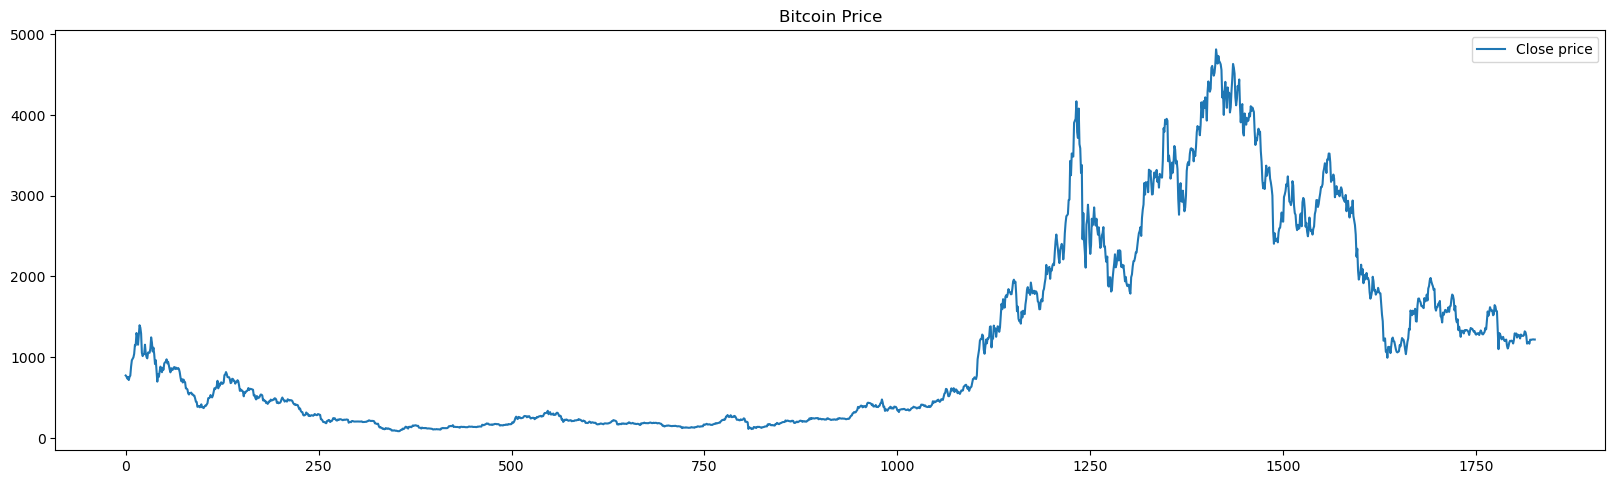

In [77]:
plt.figure(figsize=(20,12))
plt.subplot(2, 1, 1)
plt.title('Bitcoin Price')
plt.plot(data.Close,label='Close price')
plt.legend()

## Data Visualization

**Since we are particularly interested in the close price and date variable from the dataset, so we'll just copy these two variables into a new dataset**

In [78]:
df = data[['Date', 'Close']]
df

,Date,Close
0,2017-12-26,773.835999
1,2017-12-27,762.841980
2,2017-12-28,737.023010
3,2017-12-29,753.591980
4,2017-12-30,717.257019
...,...,...
1822,2022-12-22,1218.182129
1823,2022-12-23,1220.159424
1824,2022-12-24,1221.148560
1825,2022-12-25,1218.962036


**We need to group data for better understanding to it is advised to convert Date column into 'Datetime' type and extract needful information.**

In [79]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df.dtypes

Date     datetime64[ns]
Close           float64
Year              int64
Month             int64
dtype: object

In [80]:
df1= df.groupby(['Date'])['Close'].mean()
print(df1.head(10))

Date
2017-12-26    773.835999
2017-12-27    762.841980
2017-12-28    737.023010
2017-12-29    753.591980
2017-12-30    717.257019
2017-12-31    756.732971
2018-01-01    772.640991
2018-01-02    884.443970
2018-01-03    962.719971
2018-01-04    980.921997
Name: Close, dtype: float64


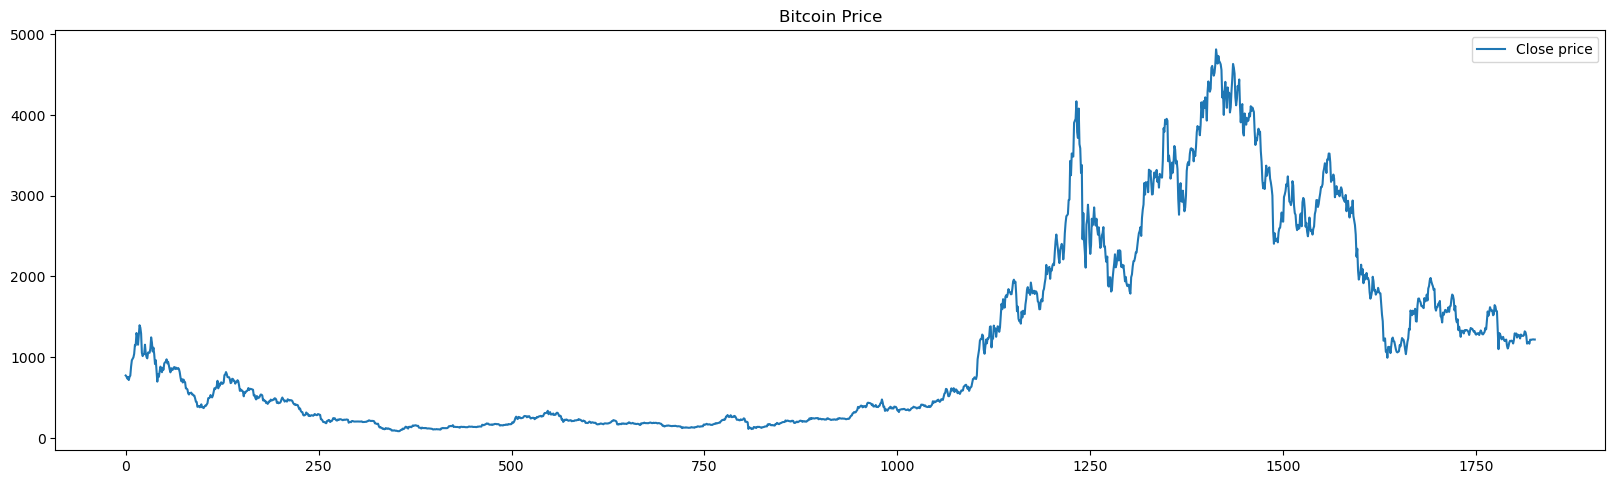

In [81]:
plt.figure(figsize=(20,12))
plt.subplot(2, 1, 1)
plt.title('Bitcoin Price')
plt.plot(df.Close,label='Close price')
plt.legend()

## Stationarity

**Stationarity in a time-series data is a very important feature as it becomes relatively easier and statistically more accurate to apply time series methodologies on a stationary series and thus derive the business decisions. A data is said to be stationary if the mean, variance and autocorrelation structure do not show any difference over time. In other words, the data should not contain any trends or seasonality and has to show a constant variance and autocorrelation structure over time.
We will use ADF Test to acertain the stationarity of the Closing Price series.**

### Augmented Dickey-Fuller (ADF) TEST

**The Augmented Dickey-Fuller Test (ADF) is a stationarity unit root test. The null hypothesis of ADF test is that series is non-stationary. Since ADF statistic is greater than critical values, we cannot reject the null hypothesis. Hence, this imply that the series is non-stationary.**

In [82]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    ADF=adfuller(series)
    print(f'ADF Statistic is: {ADF[0]}')
    print(f'p-value is: {ADF[1]}')
    print(f'Number of lags: {ADF[2]}')
    print(f'Number of obs: {ADF[3]}')
    print(f'Critical Values: {ADF[4]}')
    if ADF[1] <= 0.05:
        print("Strong evidence against null hypothesis, so we reject null hypothesis")
    else:
        print("Weak evidence against null hypothesis implying we fail to reject null hypothesis")
        
adf_test(df['Close'])

ADF Statistic is: -1.3135977823213412
p-value is: 0.6229285788758646
Number of lags: 17
Number of obs: 1809
Critical Values: {'1%': -3.4339700129534423, '5%': -2.8631390341376393, '10%': -2.567621272963846}
Weak evidence against null hypothesis implying we fail to reject null hypothesis


### Plotting the rolling statistics against original series

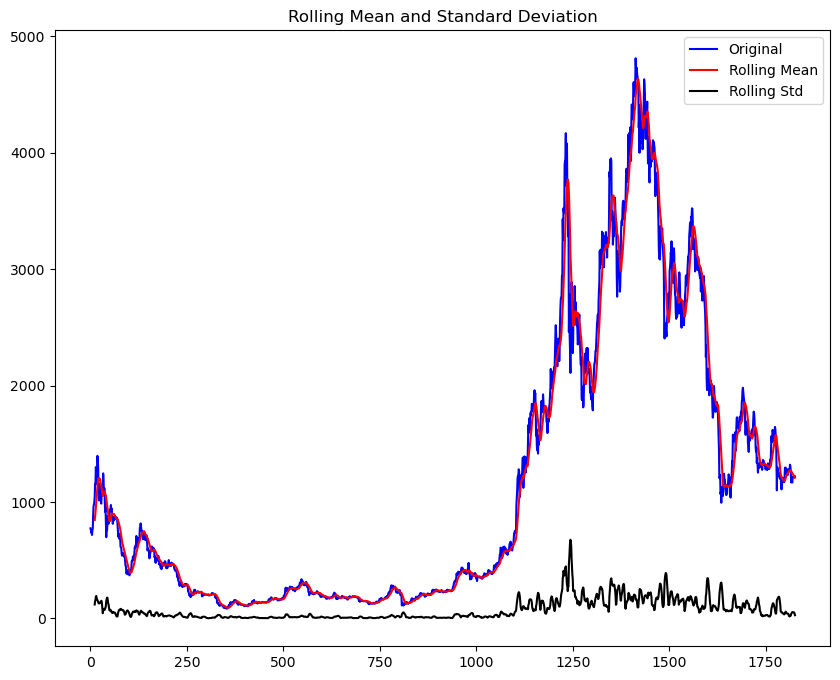

In [83]:
rolling_mean = df['Close'].rolling(12).mean()
rolling_std = df['Close'].rolling(12).std()

#Plot rolling statistics:
plt.figure(figsize=(10,8))
plt.plot(df['Close'], color='blue',label='Original')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.plot(rolling_std, color='black', label = 'Rolling Std')
plt.legend()
plt.title('Rolling Mean and Standard Deviation')
plt.show()

**Through the above graph, we can see that standard deviation is fairly constant in the series but increasing mean implies the non-stationarity of the series.**

### Tranforming the series into Stationary

**There are multiple ways of transforming the a non-stationary series into stationary:**
1. Differencing
2. Scale transformation : Using log or sqaure root of the data
3. Seasonal Decomposition

#### First Differencing

In [84]:
df['Close_FD'] = df['Close']-df['Close'].shift(1)
df['Close_FD'].isnull().sum()

1

In [85]:
df['Close_FD'] = df['Close_FD'].fillna(0)

In [86]:
adf_test(df['Close_FD'])

ADF Statistic is: -10.747228303790623
p-value is: 2.722165388005291e-19
Number of lags: 16
Number of obs: 1810
Critical Values: {'1%': -3.433968010099092, '5%': -2.8631381499714745, '10%': -2.567620802173316}
Strong evidence against null hypothesis, so we reject null hypothesis


<AxesSubplot:title={'center':'First Difference of Closing Price'}>

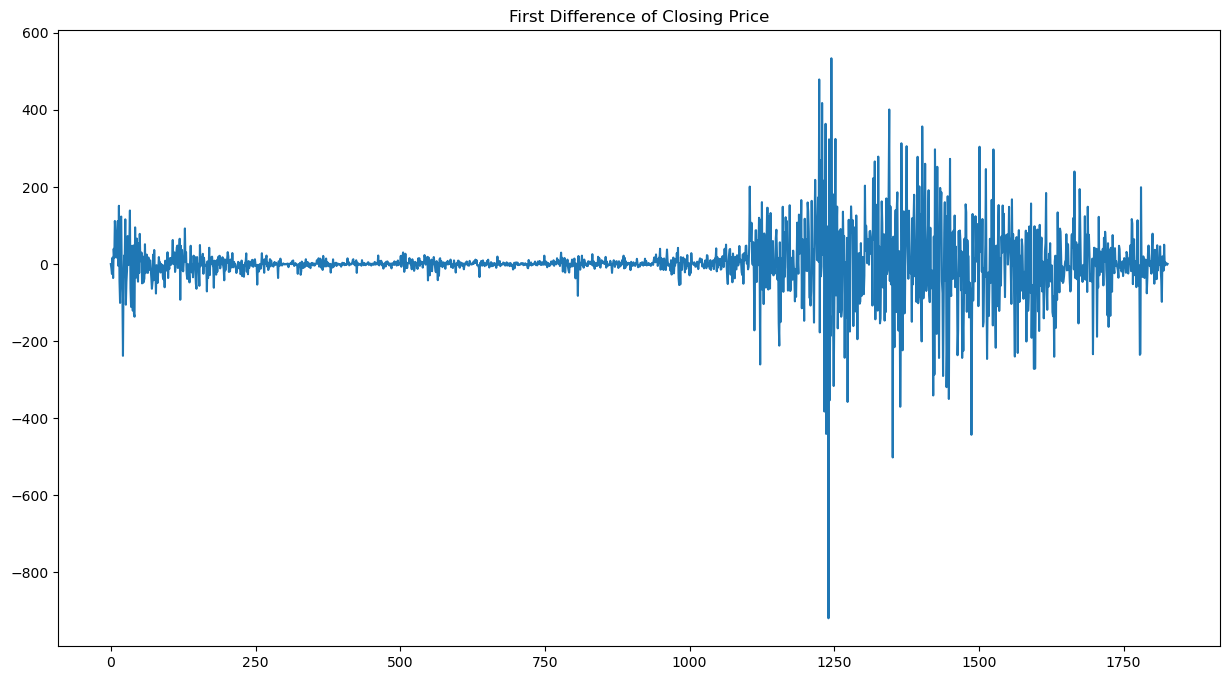

In [87]:
df['Close_FD'].plot(figsize=(15,8), title= "First Difference of Closing Price")

**After first differencing we got the stationarity in the closing price.**

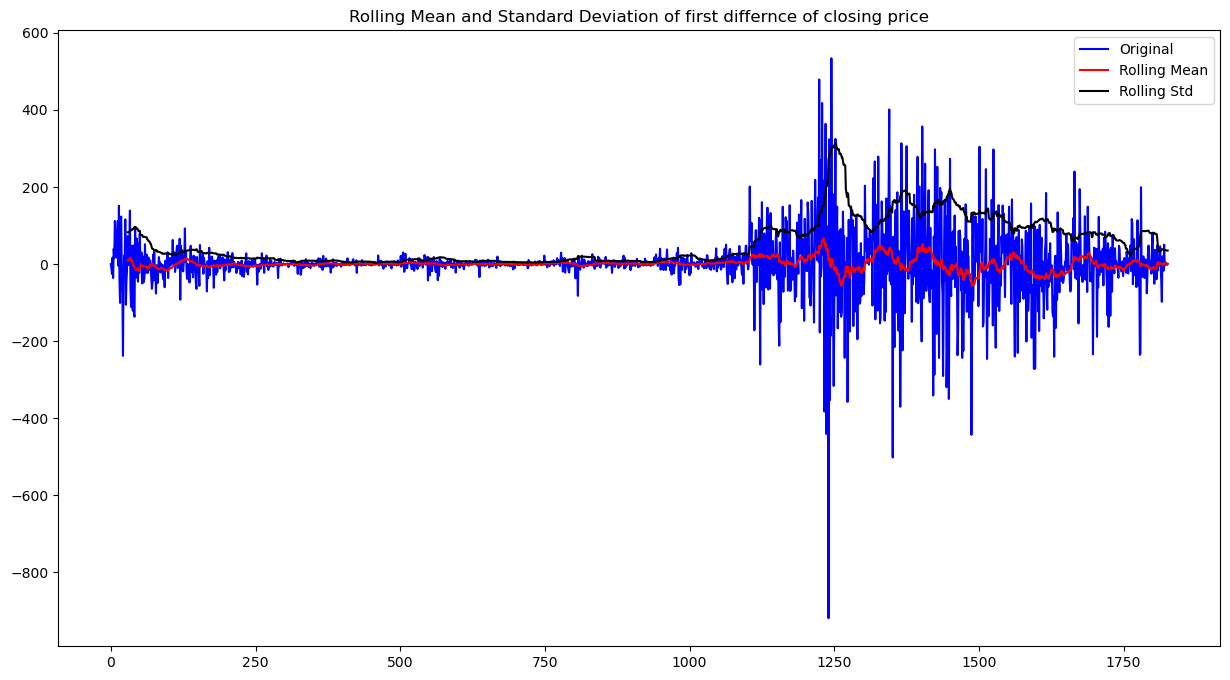

In [88]:
FDrolling_mean = df['Close_FD'].rolling(30).mean()
FDrolling_std = df['Close_FD'].rolling(30).std()

#Plot rolling statistics:
plt.figure(figsize=(15,8))
plt.plot(df['Close_FD'], color='blue',label='Original')
plt.plot(FDrolling_mean, color='red', label='Rolling Mean')
plt.plot(FDrolling_std, color='black', label = 'Rolling Std')
plt.legend()
plt.title('Rolling Mean and Standard Deviation of first differnce of closing price')
plt.show()

**The rolling mean and standard deviation are in line with the average trend in the series.**

#### Seasonal Decomposition

**Seasoanlity is a cyclic event that occurs in time series for a short time and causes the increasing or decreasing patterns for a short time in a time series. There are two types of seasonality:**

**-Additive time series: In this, the components of the time series are added together to make the time series. Visually, the increasing or decreasing pattern of the time series is similar throughout the series.**

**-Multiplicative time series: In this, the components of the time series are multiplicative together. Visually, the time series is having exponential growth or decrement with time.**

<Figure size 640x480 with 0 Axes>

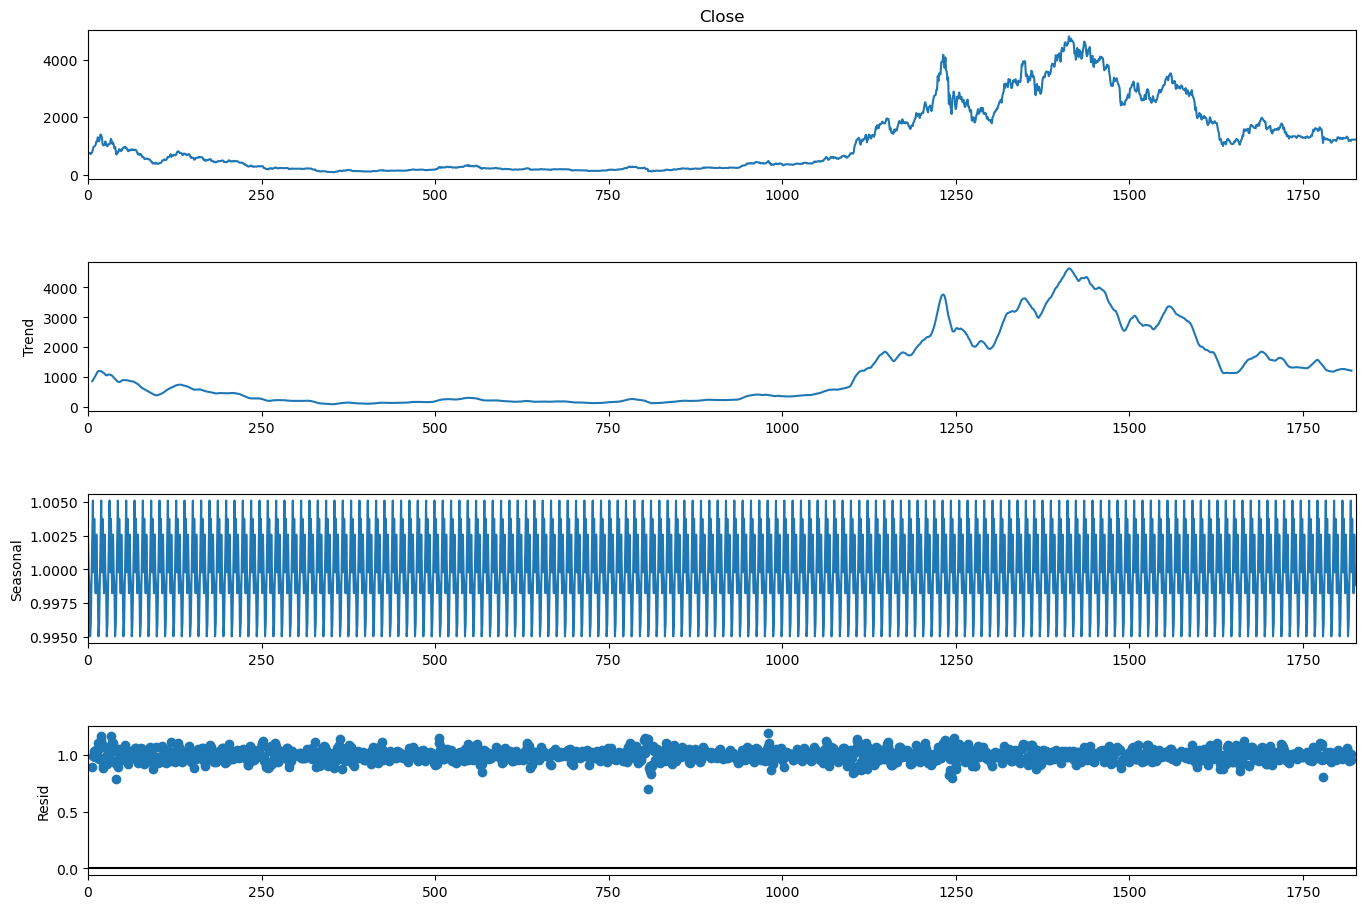

In [89]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df["Close"], 
                            model='multiplicative', period = 12)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 10)

**As we see, the data contains the seasonality which we can capture using SARIMA model.**

## ACF and PACF
**The  autocorrelation function is the amount of correlation between a variable and a lag of itself whereas the partial autocorrelation is the amount of correlation between a variable and a lag of itself that is not explained by correlations at all lower-order-lags.
ACF determines the order of MA part while PACF determines the AR part of the ARIMA model.**

<function matplotlib.pyplot.show(close=None, block=None)>

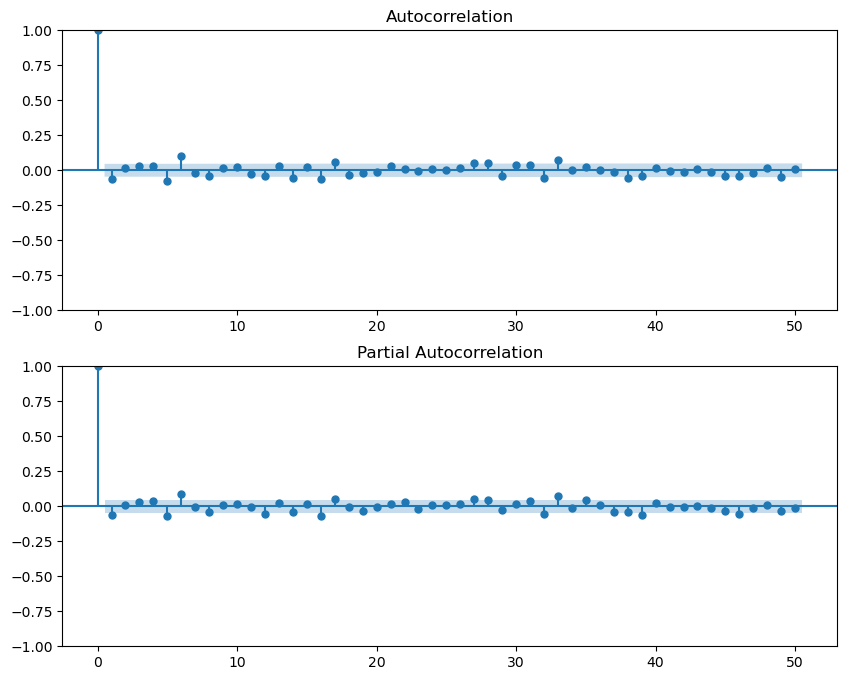

In [90]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

figure = plt.figure(figsize=(10,8))
ax1 = figure.add_subplot(2,1,1)
figure = plot_acf(df['Close_FD'], lags=50, ax=ax1)
ax2 = figure.add_subplot(2,1,2)
figure = plot_pacf(df['Close_FD'], lags=50, ax=ax2)
plt.show

**According to the ACF and PACF graphs, the ARIMA model of (5,1,2) would be the appropriate one for our analysis. However, to ascertain the parameters, we will use auto ARIMA model in the next section.**

## Training and Testing Data

In [95]:
n = int(len(df1)*0.9)
df_train = pd.DataFrame(df1[:n]).rename(columns={'Close':'y_train'})
df_test = pd.DataFrame(df1[n:]).rename(columns={'Close':'y_test'})

In [96]:
df_train

,y_train
Date,
2017-12-26,773.835999
2017-12-27,762.841980
2017-12-28,737.023010
2017-12-29,753.591980
2017-12-30,717.257019
...,...
2022-06-22,1051.421875
2022-06-23,1143.386719
2022-06-24,1226.844727


In [97]:
df_train 

,y_train
Date,
2017-12-26,773.835999
2017-12-27,762.841980
2017-12-28,737.023010
2017-12-29,753.591980
2017-12-30,717.257019
...,...
2022-06-22,1051.421875
2022-06-23,1143.386719
2022-06-24,1226.844727


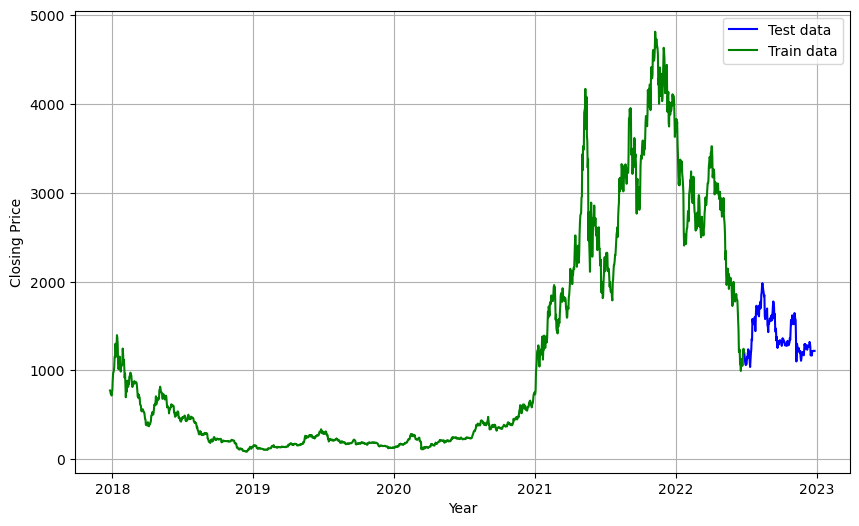

In [98]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.plot(df_test, 'blue', label='Test data')
plt.plot(df_train, 'green', label='Train data')

plt.legend()

## SARIMA Model

### Building the Model

In [99]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
import pmdarima as pm

In [100]:
# auto_arima
model_fit = pm.auto_arima(df_train, test='adf', 
                         max_p=5, max_d=2, max_q=5, 
                         seasonal=True, m=12,
                         max_P=5, max_D=5, max_Q=5,
                         trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

# summarize the model characteristics
print(model_fit.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=19119.703, Time=1.64 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=19123.581, Time=0.05 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=19115.244, Time=0.27 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=19115.514, Time=0.61 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=19121.598, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=19118.127, Time=0.08 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=19117.190, Time=0.88 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=19117.203, Time=0.74 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=19115.309, Time=0.54 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=19119.236, Time=0.81 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=19120.723, Time=0.19 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=19117.099, Time=0.30 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=19117.175, Time=0.27 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=19115.436, Time=0.50 sec
 ARIM

In [101]:
import statsmodels.api as sm
import warnings


model=sm.tsa.statespace.SARIMAX(df['Close'],
                                order=(1, 1, 0),
                                seasonal_order=(1, 0, 0, 12))
model=model.fit()
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 1827
Model:             SARIMAX(1, 1, 0)x(1, 0, 0, 12)   Log Likelihood              -10583.950
Date:                            Wed, 04 Jan 2023   AIC                          21173.899
Time:                                    20:52:32   BIC                          21190.429
Sample:                                         0   HQIC                         21179.997
                                           - 1827                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0642      0.012     -5.211      0.000      -0.088      -0.040
ar.S.L12      -0.0432      0.012   

### Predictions

In [102]:
start=len(df_train)
end=len(df_train)+len(df_test)-1
pred = model.predict(start=start,end=end)
pred

1644    1201.680320
1645    1201.160472
1646    1147.376888
1647    1105.830316
1648    1063.799939
           ...     
1822    1213.819261
1823    1217.990928
1824    1219.575346
1825    1219.072161
1826    1219.459556
Name: predicted_mean, Length: 183, dtype: float64

In [103]:
len(df_train)

1644

In [104]:
len(df_test)

183

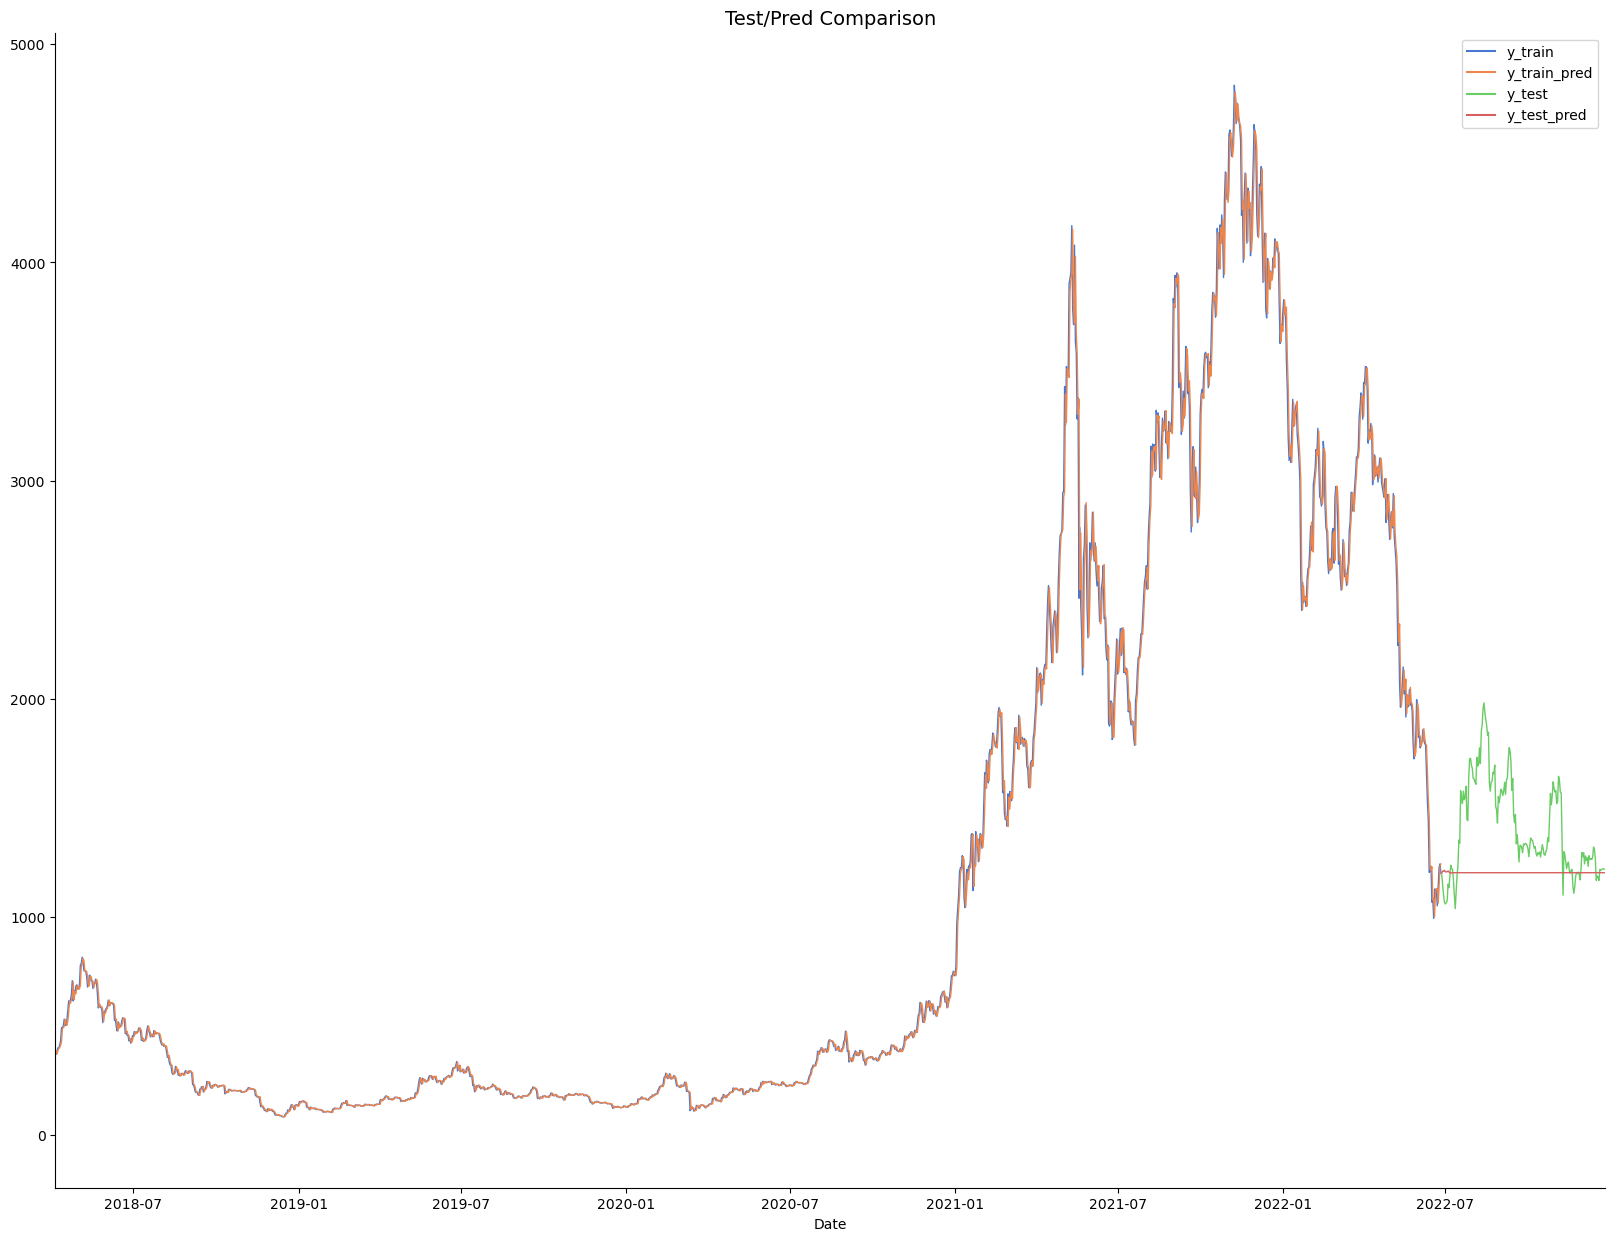

In [105]:
# Generate prediction for n periods, 
# Predictions start from the last date of the training data
pred = model_fit.predict_in_sample(dynamic=False) # works only with auto-arima
df_train['y_train_pred'] = pred
test_pred = model_fit.predict(n_periods=n, dynamic=False)
df_test['y_test_pred'] = test_pred
df_union = pd.concat([df_train, df_test])
df_union.rename(columns={'Close':'y_test'}, inplace=True)

# Print the predicted time-series
fig, ax = plt.subplots(figsize=(20, 15))
plt.title("Test/Pred Comparison", fontsize=14)
sns.despine();
sns.lineplot(data=df_union[['y_train', 'y_train_pred', 'y_test', 'y_test_pred']], linewidth=1.0, dashes=False, palette='muted')
ax.set_xlim([df_union.index[100],df_union.index.max()])
plt.legend()

## Model Evaluation

In [106]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
def mae(y_true, predictions):
    y_true, predictions = np.array(y_true), np.array(predictions)
    return np.mean(np.abs(y_true - predictions))
def mape(y_test, pred):
    y_test, pred = np.array(y_test), np.array(pred)
    mape = np.mean(np.abs((y_test - pred) / y_test))
    return mape

In [107]:
# Mean Absolute Percentage Error (MAPE)
mae = mae(df_test['y_test'], df_test['y_test_pred'])
print(f'MAE: {np.round(mae, 2)}')

# Median Absolute Percentage Error (MDAPE)
mape = mape(df_test['y_test'], df_test['y_test_pred'])*100
print(f'MAPE: {np.round(mape, 2)} %')

RMSE = np.sqrt(mean_squared_error(df_test['y_test'], df_test['y_test_pred']))
print(f'RMSE: {np.round(RMSE, 2)}')

MAE: 223.66
MAPE: 14.34 %
RMSE: 297.29
